* Importing some useful libraries

In [43]:
import pandas as pd # use for data manipulation and analysis
import numpy as np # use for multi-dimensional array and matrix

import seaborn as sns # use for high-level interface for drawing attractive and informative statistical graphics 
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications
%matplotlib inline 
# It sets the backend of matplotlib to the 'inline' backend:
import time # calculate time 

from sklearn.linear_model import LogisticRegression # algo use to predict good or bad
from sklearn.naive_bayes import MultinomialNB # nlp algo use to predict good or bad

from sklearn.model_selection import train_test_split # spliting the data between feature and target
from sklearn.metrics import classification_report # gives whole report about metrics (e.g, recall,precision,f1_score,c_m)
from sklearn.metrics import confusion_matrix # gives info about actual and predict
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text  
from nltk.stem.snowball import SnowballStemmer # stemmes words
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes  
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos

from PIL import Image # getting images in notebook
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator# creates words colud

from bs4 import BeautifulSoup # use for scraping the data from website
from selenium import webdriver # use for automation chrome 
import networkx as nx # for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

import pickle# use to dump model 

import warnings # ignores pink warnings 

from wordcloud import WordCloud 

warnings.filterwarnings('ignore')

* Loading the main dataset.

In [5]:
phish_data = pd.read_csv('phishing_site_urls.csv')

In [6]:
phish_data.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,good
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,good
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,good
3,mail.printakid.com/www.online.americanexpress....,good
4,thewhiskeydregs.com/wp-content/themes/widescre...,good


In [7]:
phish_data.tail()

,URL,Label
1648033,23.227.196.215/,bad
1648034,apple-checker.org/,bad
1648035,apple-iclods.org/,bad
1648036,apple-uptoday.org/,bad
1648037,apple-search.info,bad


In [8]:
phish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648038 entries, 0 to 1648037
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   URL     1648038 non-null  object
 1   Label   1648038 non-null  object
dtypes: object(2)
memory usage: 25.1+ MB


In [9]:
phish_data.isnull().sum()

URL      0
Label    0
dtype: int64

* Since it is classification problems so let's see the classes are balanced or imbalances

In [11]:
#create a dataframe of classes counts
label_counts = pd.DataFrame(phish_data.Label.value_counts())

<AxesSubplot:ylabel='Label'>

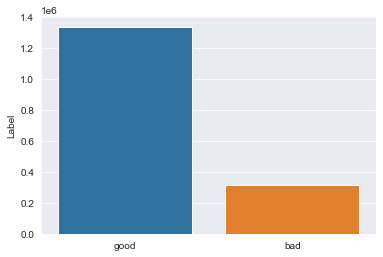

In [12]:
#visualizing target_col
sns.set_style('darkgrid')
sns.barplot(label_counts.index,label_counts.Label)

### Preprocessing

* Now that we have the data, we have to vectorize our URLs. I used CountVectorizer and gather words using tokenizer, since there are words in urls that are more important than other words e.g ‘virus’, ‘.exe’ ,’.dat’ etc. Lets convert the URLs into a vector form.

#### RegexpTokenizer
* A tokenizer that splits a string using a regular expression, which matches either the tokens or the separators between tokens.

In [13]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [14]:
phish_data.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [15]:
# this will be pull letter which matches to expression
tokenizer.tokenize(phish_data.URL[0]) # using first row

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [16]:
print('Getting words tokenized ...')
t0= time.perf_counter()
phish_data['text_tokenized'] = phish_data.URL.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 10.704070600000023 sec


In [17]:
phish_data.sample(5)

,URL,Label,text_tokenized
941586,motorships.dk/english/fednav%20.html,good,"[motorships, dk, english, fednav, html]"
394743,musicstack.com/records-cds/nini,good,"[musicstack, com, records, cds, nini]"
570356,www.bl35.org/images/?us.battle.net/login/en/?r...,bad,"[www, bl, org, images, us, battle, net, login,..."
1340351,sports.espn.go.com/nfl/trainingcamp10/news/sto...,good,"[sports, espn, go, com, nfl, trainingcamp, new..."
1563913,wit.edu/humanities/directory/directory-faculty...,good,"[wit, edu, humanities, directory, directory, f..."


#### SnowballStemmer
* Snowball is a small string processing language, gives root words

In [18]:
stemmer = SnowballStemmer("english") # choose a language

In [19]:
print('Getting words stemmed ...')
t0= time.perf_counter()
phish_data['text_stemmed'] = phish_data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 171.69191260000002 sec


In [20]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed
1268722,en.wikipedia.org/wiki/1958_NCAA_Men%27s_Divisi...,good,"[en, wikipedia, org, wiki, NCAA, Men, s, Divis...","[en, wikipedia, org, wiki, ncaa, men, s, divis..."
363887,isthisyour.name/martin_menjivar.htm,good,"[isthisyour, name, martin, menjivar, htm]","[isthisyour, name, martin, menjivar, htm]"
1080090,kveldeil.no/gfk2p,bad,"[kveldeil, no, gfk, p]","[kveldeil, no, gfk, p]"
7824,www.kiarmedical.com/ckfinder/userfiles/images/...,good,"[www, kiarmedical, com, ckfinder, userfiles, i...","[www, kiarmed, com, ckfinder, userfil, imag, w..."
961459,parl.gc.ca/common/Committee_SenBio.asp?senator...,good,"[parl, gc, ca, common, Committee, SenBio, asp,...","[parl, gc, ca, common, committe, senbio, asp, ..."


In [21]:
print('Getting joiningwords ...')
t0= time.perf_counter()
phish_data['text_sent'] = phish_data['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting joiningwords ...
Time taken 3.2283426999999847 sec


In [22]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed,text_sent
1639846,labadinom.com/data/feeder/,bad,"[labadinom, com, data, feeder]","[labadinom, com, data, feeder]",labadinom com data feeder
1441840,fringeandfeathersblog.com/,good,"[fringeandfeathersblog, com]","[fringeandfeathersblog, com]",fringeandfeathersblog com
1606645,dnat400.ru/system/logs/pm.dll,bad,"[dnat, ru, system, logs, pm, dll]","[dnat, ru, system, log, pm, dll]",dnat ru system log pm dll
1428885,facebook.com/pages/Philip-Guston/105505426149872,good,"[facebook, com, pages, Philip, Guston]","[facebook, com, page, philip, guston]",facebook com page philip guston
1346077,thesubversivesounds.blogspot.com/2007/06/rainm...,good,"[thesubversivesounds, blogspot, com, rainmaker...","[thesubversivesound, blogspot, com, rainmak, t...",thesubversivesound blogspot com rainmak tornad...


### Visualization 
**1. Visualize some important keys using word cloud**

In [24]:
#sliceing classes
bad_sites = phish_data[phish_data.Label == 'bad']
good_sites = phish_data[phish_data.Label == 'good']

In [25]:
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
549346,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
549347,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
549348,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
549349,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
549350,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [26]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,good,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,good,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,good,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,good,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,good,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


* create a function to visualize the important keys from url 

In [35]:
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set('com')
    more_stopwords = {'com','http'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()

In [36]:
data = good_sites.text_sent
data.reset_index(drop=True, inplace=True)

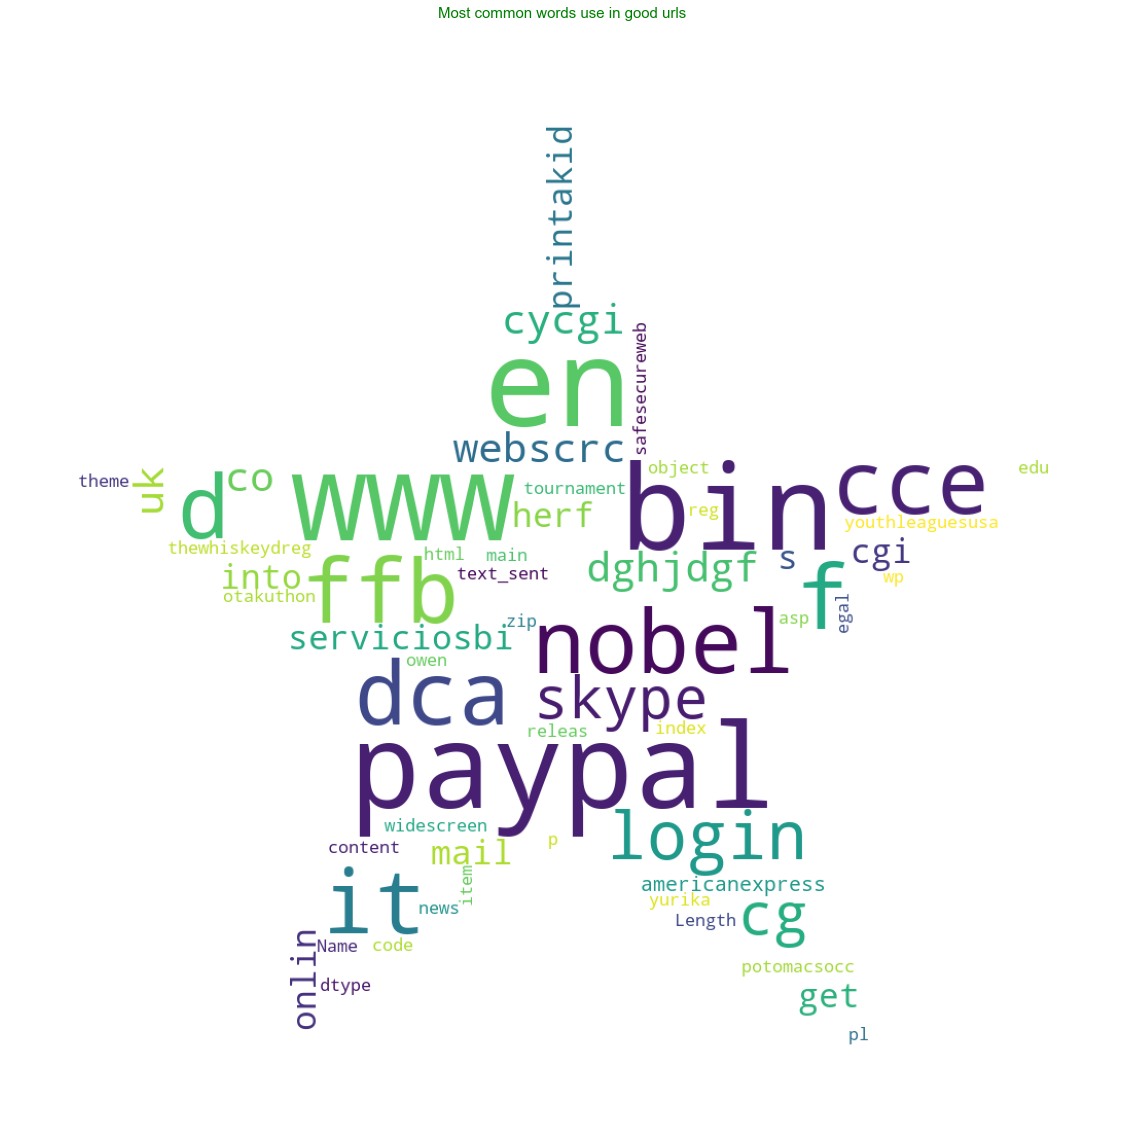

In [44]:
common_text = str(data)
common_mask = np.array(Image.open('star.png'))
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120, 
               title = 'Most common words use in good urls', title_size=15)

In [45]:
data = bad_sites.text_sent
data.reset_index(drop=True, inplace=True)

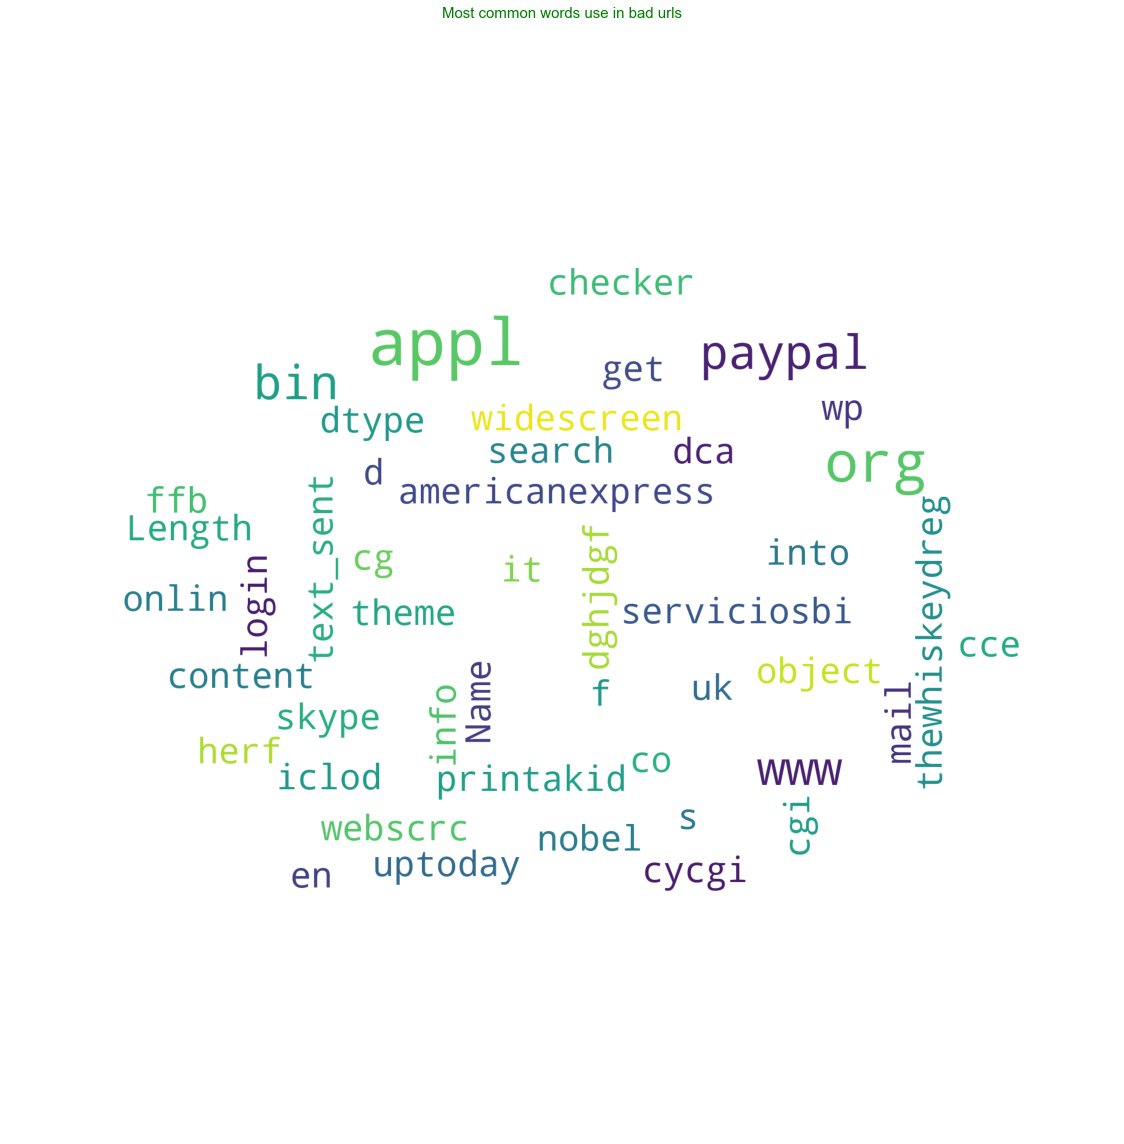

In [46]:
common_text = str(data)
common_mask = np.array(Image.open('comment.png'))
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120, 
               title = 'Most common words use in bad urls', title_size=15)

### Creating Model

#### CountVectorizer
* CountVectorizer is used to transform a corpora of text to a vector of term / token counts.

In [51]:
#create cv object
cv = CountVectorizer()

In [53]:
feature = cv.fit_transform(phish_data.text_sent) #transform all text which we tokenize and stemed

In [54]:
feature[:5].toarray() # convert sparse matrix into array to print transformed features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

#### * Spliting the data 

In [55]:
trainX, testX, trainY, testY = train_test_split(feature, phish_data.Label)

### LogisticRegression
* Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

In [56]:
# create lr object
lr = LogisticRegression()

In [57]:
lr.fit(trainX,trainY)

LogisticRegression()

In [59]:
lr.score(testX,testY)

0.8645105701317929

.Logistic Regression is giving 86% accuracy, Now we will store scores in dict to see which model perform best

In [60]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)

Training Accuracy : 0.8739607840599081
Testing Accuracy : 0.8645105701317929

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.63      0.65      0.64     75476
        Good       0.92      0.91      0.92    336534

    accuracy                           0.86    412010
   macro avg       0.77      0.78      0.78    412010
weighted avg       0.87      0.86      0.87    412010


CONFUSION MATRIX


<AxesSubplot:>

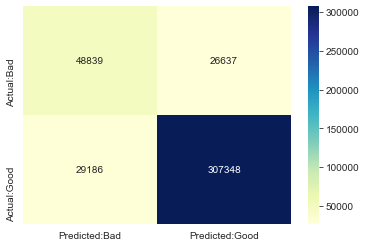

In [61]:
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

### MultinomialNB
* Applying Multinomial Naive Bayes to NLP Problems. Naive Bayes Classifier Algorithm is a family of probabilistic algorithms based on applying Bayes' theorem with the “naive” assumption of conditional independence between every pair of a feature.

In [62]:
# create mnb object
mnb = MultinomialNB()

In [63]:
mnb.fit(trainX,trainY)

MultinomialNB()

In [64]:
mnb.score(testX,testY)

0.884912987548846

MultinomialNB gives us 88% accuracy

In [65]:
Scores_ml['MultinomialNB'] = np.round(mnb.score(testX,testY),2)

Training Accuracy : 0.8923390085014256
Testing Accuracy : 0.884912987548846

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.86      0.65      0.74    102942
        Good       0.89      0.96      0.93    309068

    accuracy                           0.88    412010
   macro avg       0.87      0.81      0.83    412010
weighted avg       0.88      0.88      0.88    412010


CONFUSION MATRIX


<AxesSubplot:>

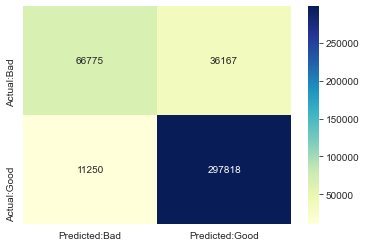

In [66]:
print('Training Accuracy :',mnb.score(trainX,trainY))
print('Testing Accuracy :',mnb.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(mnb.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

<AxesSubplot:ylabel='Accuracy'>

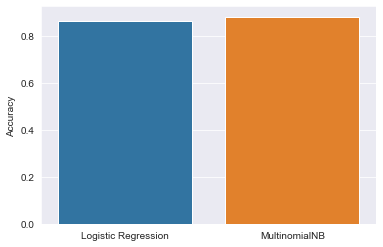

In [67]:
acc = pd.DataFrame.from_dict(Scores_ml,orient = 'index',columns=['Accuracy'])
sns.set_style('darkgrid')
sns.barplot(acc.index,acc.Accuracy)

In [68]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), MultinomialNB())
##(r'\b(?:http|ftp)s?://\S*\w|\w+|[^\w\s]+') ([a-zA-Z]+)([0-9]+) -- these tolenizers giving me low accuray 

In [69]:
trainX, testX, trainY, testY = train_test_split(phish_data.URL, phish_data.Label)

In [70]:
pipeline_ls.fit(trainX,trainY)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('multinomialnb', MultinomialNB())])

In [71]:
pipeline_ls.score(testX,testY)

0.8843329045411519

Training Accuracy : 0.8924644101913549
Testing Accuracy : 0.8843329045411519

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.85      0.65      0.73    101867
        Good       0.89      0.96      0.93    310143

    accuracy                           0.88    412010
   macro avg       0.87      0.81      0.83    412010
weighted avg       0.88      0.88      0.88    412010


CONFUSION MATRIX


<AxesSubplot:>

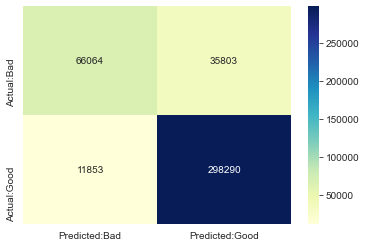

In [72]:
print('Training Accuracy :',pipeline_ls.score(trainX,trainY))
print('Testing Accuracy :',pipeline_ls.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [73]:
pickle.dump(pipeline_ls,open('phishing.pkl','wb'))

In [74]:
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.score(testX,testY)
print(result)

0.8843329045411519
